In [21]:
%pip install -e ..

Obtaining file:///Users/arjunraj/code/SGanalysis
  Preparing metadata (setup.py) ... done
  Attempting uninstall: SGanalysis
    Found existing installation: SGanalysis 0.1.0
    Uninstalling SGanalysis-0.1.0:
      Successfully uninstalled SGanalysis-0.1.0
  Running setup.py develop for SGanalysis
Note: you may need to restart the kernel to use updated packages.


In [22]:
import numpy as np
import cv2
import tifffile as tiff
from shapely.geometry import Polygon, mapping, shape, box
from skimage import io
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
import json
from rasterio import features

from SGanalysis.SGobject import SGobject


In [2]:
sg_obj = SGobject()

# Convert a TIFF image to polygons and store them in a GeoDataFrame
print("Running mask_to_objects...")
sg_obj.mask_to_objects('/Users/arjunraj/code/convert_masks_SG/segment_20231115_cells.tiff')

Running mask_to_objects...


In [3]:
spot_file = '/Users/arjunraj/code/convert_masks_SG/transcripts_no_segmentation.csv'
sg_obj.load_points(spot_file)

In [23]:
# Number of objects in the gdf
print("Number of objects in the gdf: ", len(sg_obj.gdf))
print(sg_obj.gdf.head())

Number of objects in the gdf:  12011
   object_id                                            nucleus
0       28.0  POLYGON ((17368.000 0.000, 17486.000 0.000, 17...
1       18.0  POLYGON ((31827.000 0.000, 31979.000 0.000, 31...
2       23.0  POLYGON ((14546.000 0.000, 14671.000 0.000, 14...
3        1.0  POLYGON ((0.000 0.000, 0.000 77.000, 12.000 82...
4        9.0  POLYGON ((31410.000 0.000, 31573.000 0.000, 31...


In [24]:
# Number of points in the points_gdf
print("Number of points in the points_gdf: ", len(sg_obj.points_gdf))
print(sg_obj.points_gdf.head())

Number of points in the points_gdf:  10345711
    name               refid     x   y                 geometry
0  Nupr1  ENSMUSG00000030717    82  91    POINT (82.000 91.000)
1  Nupr1  ENSMUSG00000030717  2551  72  POINT (2551.000 72.000)
2  Nupr1  ENSMUSG00000030717  2441  97  POINT (2441.000 97.000)
3  Nupr1  ENSMUSG00000030717  3022  36  POINT (3022.000 36.000)
4  Nupr1  ENSMUSG00000030717  3187  44  POINT (3187.000 44.000)


In [7]:

# Assign points to cells
sg_obj.create_cell_count_df()
print(sg_obj.cell_count_df.head())

4235747 of 10323626 spots (41.0%) assigned to an object.
name       Ada  Add3  Adh6a  Agr2  Ahnak  Aldh1b1  Aldob  Alpi  Ang4  Anxa1  \
object_id                                                                     
1.0          0     0      0     0      0        0      0     0     0      0   
2.0          1     0      0     0     18        0      0     0     0      1   
3.0          0     0      0     0      6        1      0     0     0      0   
4.0          0     0      0     0      2        0      0     0     0      0   
5.0          1     0      0     0     21        0      0     0     0      3   

name       ...  Tff3  Tm4sf20  Tm4sf4  Tph1  Tuba1a  Txndc5  Vim  Yap1  \
object_id  ...                                                           
1.0        ...     0        0       0     0       0       0    0     0   
2.0        ...     0        0       3     0       0       0    0     0   
3.0        ...     0        0       0     0       0       0    0     1   
4.0        ...     

Number of objects: 12011
Number of points: 10345711
Average number of points per object: 861.35
Percentage of points assigned to an object: 40.94%
Average number of assigned points per object: 352.66
Average number of unique genes detected per object: 37.46
Total number of genes detected: 140
Total number of genes detected (assigned to objects): 140


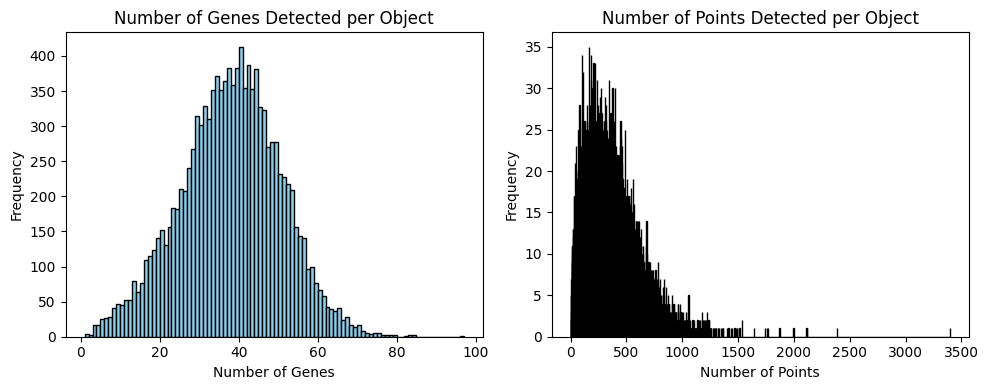

In [25]:
sg_obj.generate_statistics_and_histograms()

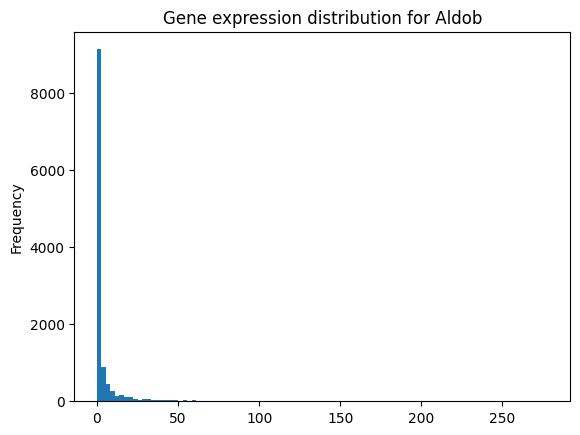

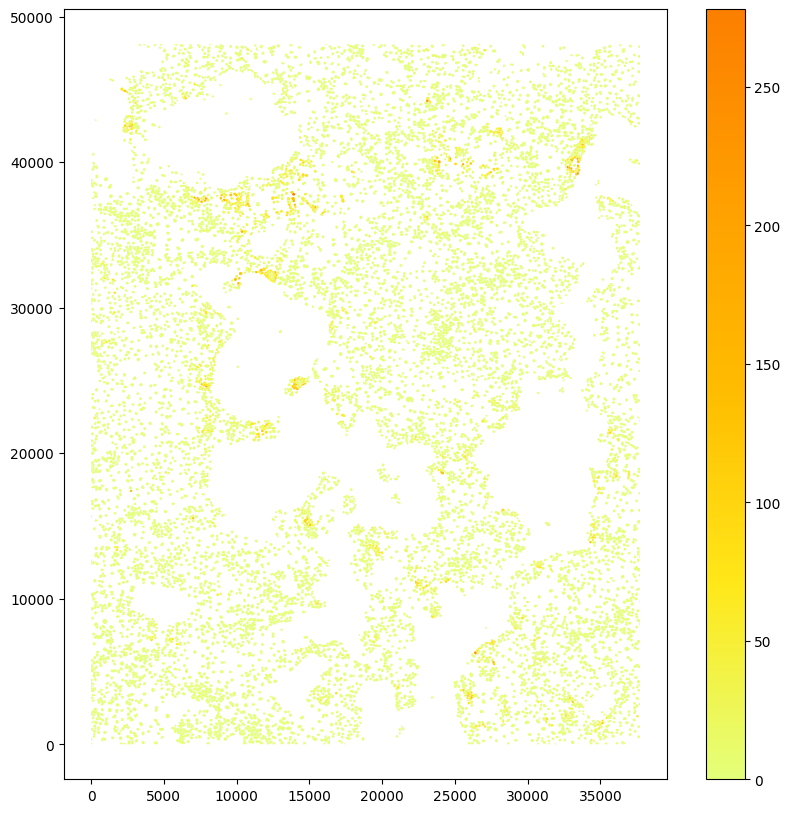

Statistics for gene Aldob: count    12007.000000
mean         5.154243
std         16.147198
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        278.000000
Name: Aldob, dtype: float64
Number of objects expressing Aldob: 4739 out of 12007 (39.47%)


In [26]:
sg_obj.show_gene_stats_plots("Aldob")

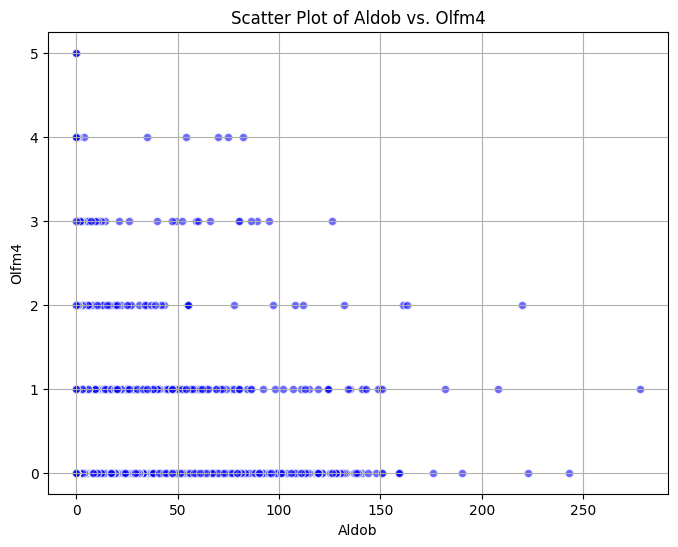

In [27]:
# Plot a scatter of Aldob vs. Lgr5
sg_obj.plot_gene_scatter("Aldob", "Olfm4")

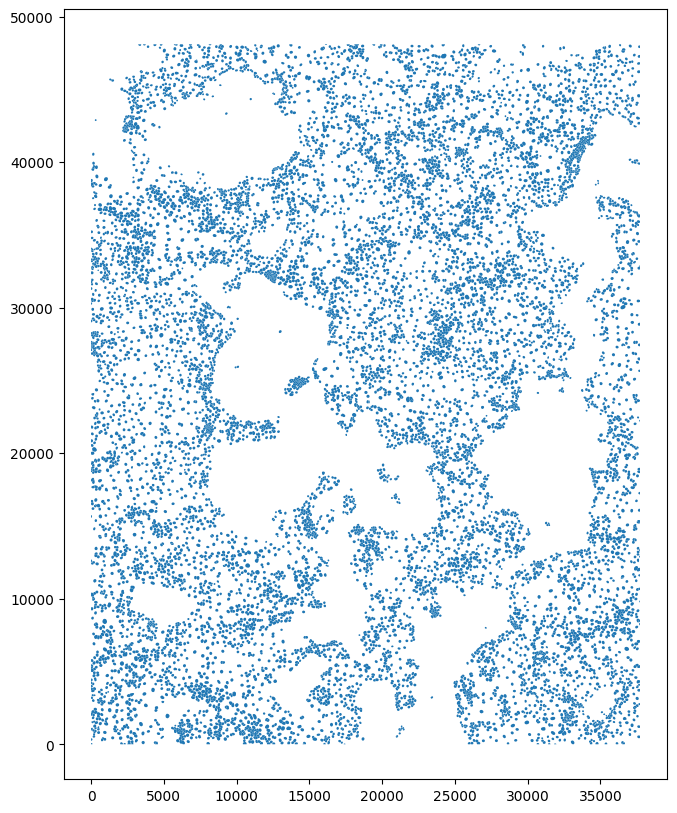

In [28]:
sg_obj.gdf.plot(figsize=(10, 10))
plt.show()

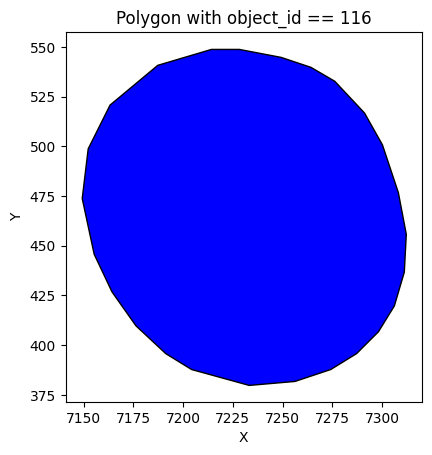

In [29]:
sg_obj.plot_polygon_by_id(116)

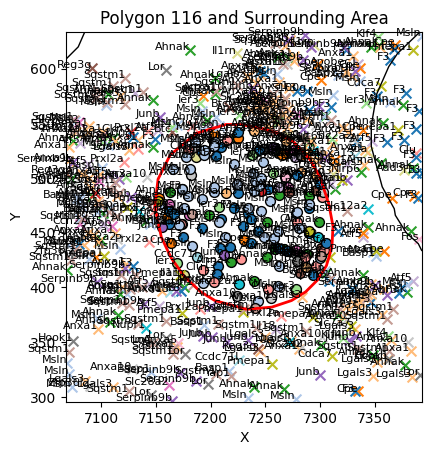

In [30]:

sg_obj.plot_polygon_and_points(116)

Now let's load Cat's data, which was segmented in NimbusImage and exported as JSON.

In [37]:
# Now try the JSON file and working with Cat's data

json_file = '/Users/arjunraj/code/convert_masks_SG/hyb_1_aligned_20240219-test-segmentation.json'
sg_obj2 = SGobject()
sg_obj2.nimbus_json_to_objects(json_file)
print(sg_obj2.gdf.head())

                  object_id                                            nucleus
0  65d3a2a53f73fc2469cc3ab5  POLYGON ((4972.000 1802.000, 4936.000 1826.000...
1  65d3a2a53f73fc2469cc3ab6  POLYGON ((4789.000 1823.000, 4768.000 1828.000...
2  65d3a2a53f73fc2469cc3ab7  POLYGON ((5110.000 1854.000, 5078.000 1859.000...
3  65d3a2a53f73fc2469cc3ab8  POLYGON ((4368.000 1903.000, 4360.000 1906.000...
4  65d3a2a53f73fc2469cc3ab9  POLYGON ((4837.000 1911.000, 4815.000 1917.000...


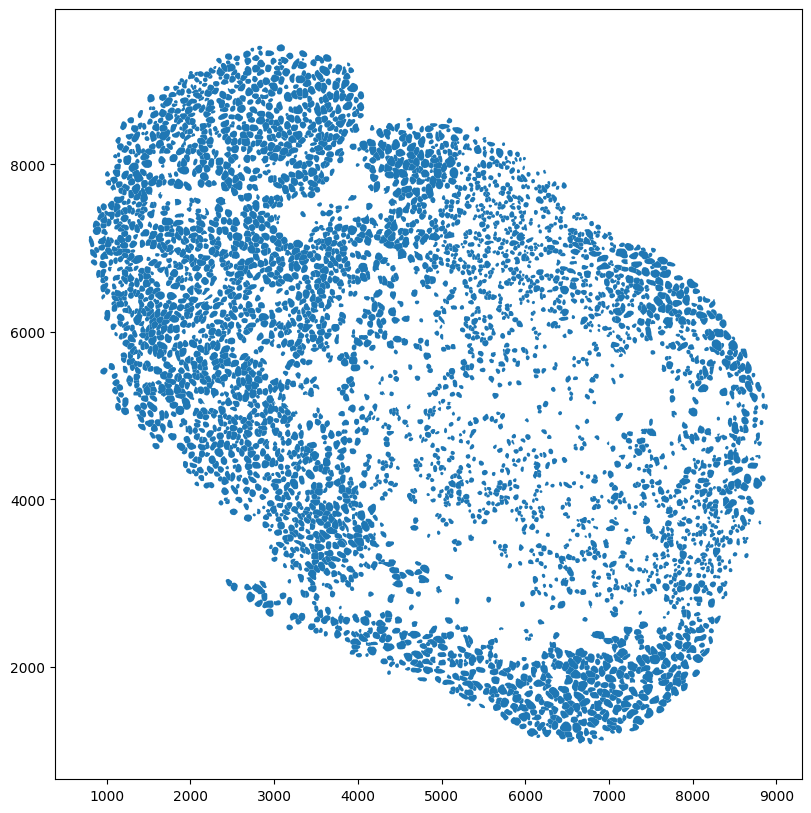

In [35]:
sg_obj2.gdf.plot(figsize=(10, 10))
plt.show()

Dilation completed. Output column: 'nucleus_dilated' is now the active geometry column.


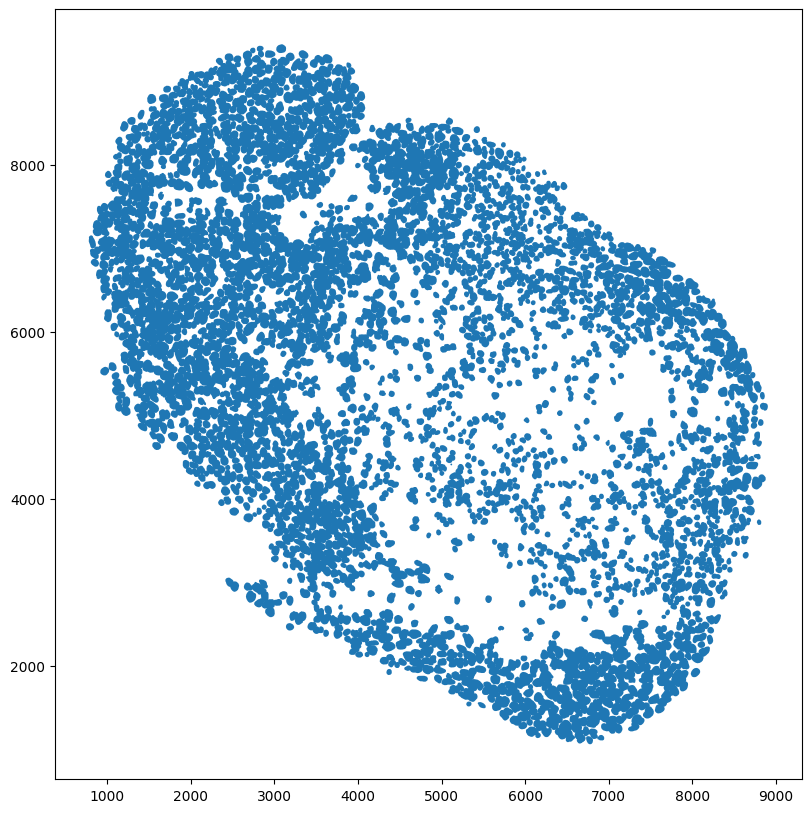

In [38]:
sg_obj2.dilate_objects(10)
sg_obj2.gdf.plot(figsize=(10, 10))
plt.show()

In [39]:
print(sg_obj2.gdf.head()) # Shows how the various shapes are stored in the GeoDataFrame

                  object_id  \
0  65d3a2a53f73fc2469cc3ab5   
1  65d3a2a53f73fc2469cc3ab6   
2  65d3a2a53f73fc2469cc3ab7   
3  65d3a2a53f73fc2469cc3ab8   
4  65d3a2a53f73fc2469cc3ab9   

                                             nucleus  \
0  POLYGON ((4972.000 1802.000, 4936.000 1826.000...   
1  POLYGON ((4789.000 1823.000, 4768.000 1828.000...   
2  POLYGON ((5110.000 1854.000, 5078.000 1859.000...   
3  POLYGON ((4368.000 1903.000, 4360.000 1906.000...   
4  POLYGON ((4837.000 1911.000, 4815.000 1917.000...   

                                     nucleus_dilated  
0  POLYGON ((4974.169 1792.238, 4973.176 1792.069...  
1  POLYGON ((4789.555 1813.015, 4788.591 1813.008...  
2  POLYGON ((5116.247 1846.191, 5115.405 1845.587...  
3  POLYGON ((4370.290 1893.266, 4369.324 1893.088...  
4  POLYGON ((4838.322 1901.088, 4837.328 1901.005...  


In [40]:
spot_file = '/Users/arjunraj/code/convert_masks_SG/test.csv'

sg_obj2.load_points(spot_file)
sg_obj2.create_cell_count_df()
print(sg_obj2.cell_count_df.head())

428559 of 841314 spots (50.9%) assigned to an object.
name                      Abca7  Aldh1a2  Apoe  Atad2  Atm  Aurkb  Bad  Bax  \
object_id                                                                     
65d3a2a53f73fc2469cc3ab5      0        2     0      0    0      0    0    0   
65d3a2a53f73fc2469cc3ab6      0        0     0      0    0      0    0    0   
65d3a2a53f73fc2469cc3ab7      0        0     0      0    0      1    0    0   
65d3a2a53f73fc2469cc3ab8      0        0     0      0    0      0    0    0   
65d3a2a53f73fc2469cc3ab9      0        1     1      0    0      0    0    0   

name                      Bbc3  Bcl2  ...  Ung  Utf1  Vwf  Was  Wnt3a  Wnt5a  \
object_id                             ...                                      
65d3a2a53f73fc2469cc3ab5     0     0  ...    1     0    1    0      0      0   
65d3a2a53f73fc2469cc3ab6     0     0  ...    0     0    0    0      0      0   
65d3a2a53f73fc2469cc3ab7     0     0  ...    0     0    0    0      0   

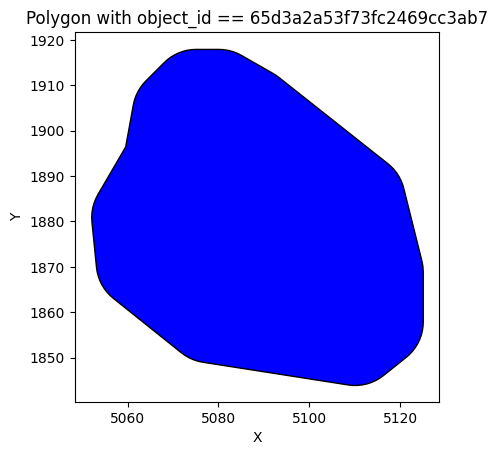

In [18]:
sg_obj2.plot_polygon_by_id("65d3a2a53f73fc2469cc3ab7")

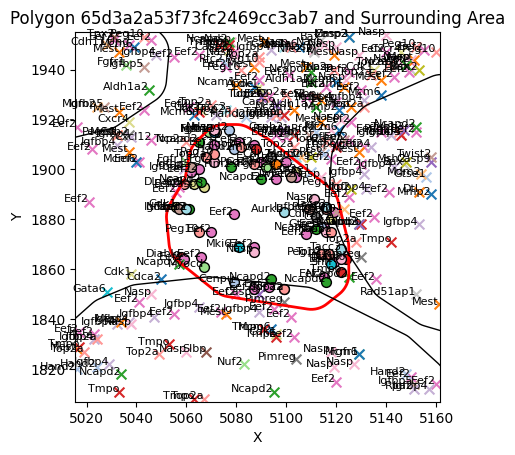

In [41]:
sg_obj2.plot_polygon_and_points("65d3a2a53f73fc2469cc3ab7")

Number of objects: 4330
Number of points: 845413
Average number of points per object: 195.25
Percentage of points assigned to an object: 50.69%
Average number of assigned points per object: 98.97
Average number of unique genes detected per object: 25.81
Total number of genes detected: 221
Total number of genes detected (assigned to objects): 221


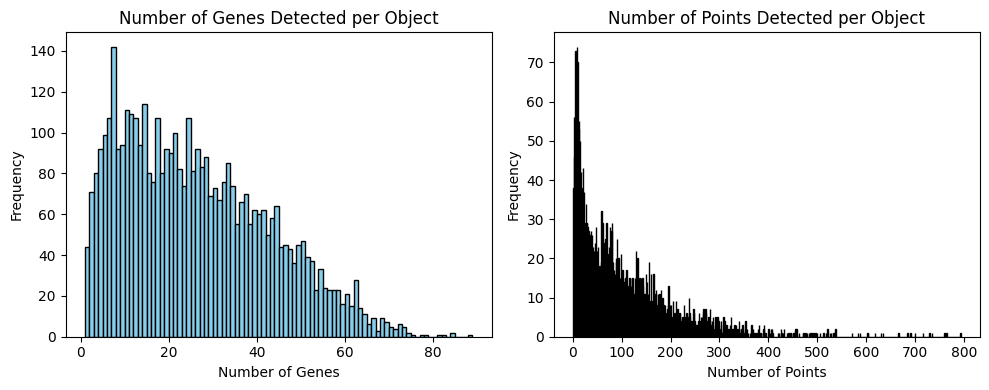

In [20]:
sg_obj2.generate_statistics_and_histograms()


In [5]:

# Save the GeoDataFrame as a GeoJSON file
print("Running save_polygons")
sg_obj.save_geojson_polygons('output_polygons.geojson')


Running save_polygons


In [ ]:

# Load polygons from a GeoJSON file (optional)
print("Running load_polygons")
sg_obj.load_geojson_polygons('output_polygons.geojson')
